In [1]:
import pandas as pd

In [2]:
dfr=pd.read_csv("/content/c_final - Sheet1.csv")
dfr

,Label,Comment
0,0.0,I had an accident with an Uber driver in Mexic...
1,1.0,I have had my account completely hacked to whe...
2,1.0,I requested an 8 mile ride in Boston on a Satu...
3,1.0,Uber is overcharging for Toll fees. When In Fl...
4,1.0,I had an airport flight today. Uber would not ...
...,...,...
1698,1.0,I tried to log in to Uber. I have only one ema...
1699,1.0,When I saw an ad online for the soon to be Ube...
1700,1.0,As a driver I was assaulted by a couple guys. ...
1701,1.0,I attempted to sign up as a driver about a mon...


In [3]:
dfr.isna().sum()

Label      14
Comment    12
dtype: int64

In [4]:
dfr=dfr.dropna()
dfr

,Label,Comment
0,0.0,I had an accident with an Uber driver in Mexic...
1,1.0,I have had my account completely hacked to whe...
2,1.0,I requested an 8 mile ride in Boston on a Satu...
3,1.0,Uber is overcharging for Toll fees. When In Fl...
4,1.0,I had an airport flight today. Uber would not ...
...,...,...
1698,1.0,I tried to log in to Uber. I have only one ema...
1699,1.0,When I saw an ad online for the soon to be Ube...
1700,1.0,As a driver I was assaulted by a couple guys. ...
1701,1.0,I attempted to sign up as a driver about a mon...


In [5]:
dfr["Label"]=dfr["Label"].astype(int)

<ipython-input-5-3b8715922685>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr["Label"]=dfr["Label"].astype(int)


In [6]:
dfr["count"]=dfr["Comment"].apply(lambda x: len(x.split()))
dfr

<ipython-input-6-50c78d3b31b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr["count"]=dfr["Comment"].apply(lambda x: len(x.split()))


,Label,Comment,count
0,0,I had an accident with an Uber driver in Mexic...,153
1,1,I have had my account completely hacked to whe...,155
2,1,I requested an 8 mile ride in Boston on a Satu...,45
3,1,Uber is overcharging for Toll fees. When In Fl...,109
4,1,I had an airport flight today. Uber would not ...,120
...,...,...,...
1698,1,I tried to log in to Uber. I have only one ema...,102
1699,1,When I saw an ad online for the soon to be Ube...,171
1700,1,As a driver I was assaulted by a couple guys. ...,63
1701,1,I attempted to sign up as a driver about a mon...,136


In [7]:
dfr.describe()

,Label,count
count,1689.000000,1689.000000
mean,0.477205,99.060391
std,0.499628,70.802207
min,0.000000,3.000000
25%,0.000000,55.000000
50%,0.000000,90.000000
75%,1.000000,128.000000
max,1.000000,1468.000000


<Figure size 800x800 with 0 Axes>

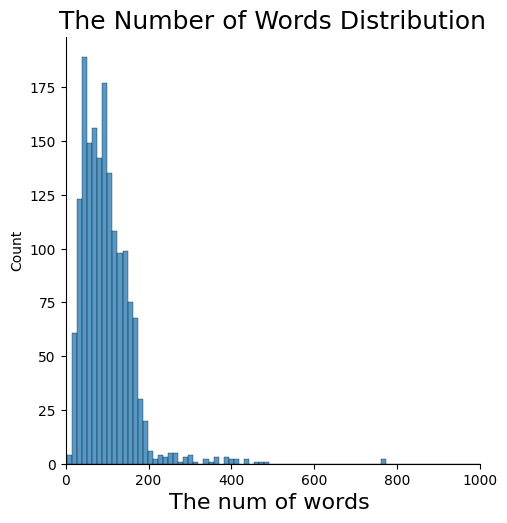

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (8, 8))

sns.displot(dfr['count'])

plt.xlim(0, 1000)

plt.xlabel('The num of words ', fontsize = 16)
plt.title("The Number of Words Distribution", fontsize = 18)
plt.show()

From the above figure it can be said that most of the words are concentrated in the range of 50-200. Model can tokenize till 512. 

In [9]:
from collections import Counter
def counter_word(text):
    count=Counter()
    for i in text.values:
        for word in i.split():
            count[word] +=1
            
    return count

In [10]:
text=dfr.Comment 
counter=counter_word(text)


In [11]:
len(counter)

13321

In [12]:
# counter

In [13]:
num_words=len(counter)
max_length=100

In [14]:
X=dfr.Comment
# X

In [15]:
y=dfr.Label
# y

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2) 

In [17]:
len(X_train)

1351

In [18]:
import tensorflow as tf 

In [19]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

In [20]:
word_index=tokenizer.word_index

In [21]:
# word_index

In [22]:
train_sequences=tokenizer.texts_to_sequences(X_train)

In [23]:
# it shows how first comment is renamed and tokenized
# train_sequences[0]

In [24]:
import keras

In [25]:
print(keras.__version__)

2.12.0


In [26]:
# from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences

In [27]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")

In [28]:
train_padded[1]

array([   6, 2454,   88,  428,   39,  142,    4, 2080,    1,   89,   10,
         44, 2991, 4172,  291,   94,  250,  559,    3,  307,  926, 1028,
          6,   15,  267,  689, 1832,   26,   39,  167, 2992,   44, 4173,
         14, 1082,   70,  746,    4, 1357,  372,  605,   11,   36,   89,
          4,  780, 2455,  148,  160,  102,  515,    9,  342,  124,   24,
         56,  385,  173,  330,   60,   24,  625,    6, 4174,    6,   79,
        180,  667, 1474,    3,   39,  746,  167,   14, 2081,   65,    1,
       1635, 1636,    1, 2993,   13,  157, 2456,  591,  439, 1252,   70,
       4175,  373,   71, 2994,   41,   54,   69,   24,  142,  298,  124,
        926], dtype=int32)

In [29]:
# padding test data

test_sequences = tokenizer.texts_to_sequences(X_test)

In [30]:
# test_sequences[0]

test_padded = pad_sequences(test_sequences, maxlen=max_length, padding="post", truncating="post")

In [31]:
# X_train.head()

In [32]:
print(dfr.Comment[374])
print(train_sequences[374])

My name is Clarence **, I was currently a full time Uber driver, Uber decided to deactivate my account which was my bread & butter for more than 13 months straight, I have a 4.90 Uber rating and I have drove more than 4800+ folks with awesome compliments, my bills which included car payment and insurance, rent and etc. My car that I financed a year ago was strictly for Uber, now I'm on the edge of losing my car and other things that matter. Please can someone help me as Uber has deactivated my account for a annual background check, I've been working for Uber for over a year and I have passed the requirements to become a Uber driver, so my question to Uber is why? Why me? And I've still haven't gotten a good response and I've been telling them about my bills and situation and they seem not to care.
[33, 10, 3548, 3549, 1, 6, 17, 7, 596, 4, 597, 25, 33, 10, 692, 283, 39, 67, 18, 250, 53, 11, 1, 46, 50, 414, 617, 38, 876, 855, 3, 382, 119, 3, 133, 1, 17, 7, 18, 649, 423, 50, 597, 23, 7, 8

In [33]:
# checking inverse

In [34]:
print(train_padded.shape)
test_padded.shape

(1351, 100)


(338, 100)

In [35]:
from keras.models import Sequential 
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

model=Sequential()

model.add(Embedding(num_words, 32, input_length=max_length))
model.add(LSTM(64, dropout=0.1))
model.add(Dense(1, activation="sigmoid"))

optimizer=Adam(learning_rate=3e-4)
          
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           426272    
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 451,169
Trainable params: 451,169
Non-trainable params: 0
_________________________________________________________________


In [37]:
# y_test

In [38]:
# y_train

In [39]:
model.fit(train_padded, y_train, epochs=50)

Epoch 1/50
43/43 [==============================] - 3s 9ms/step - loss: 0.6925 - accuracy: 0.5100
Epoch 2/50
43/43 [==============================] - 0s 7ms/step - loss: 0.6904 - accuracy: 0.5255
Epoch 3/50
43/43 [==============================] - 0s 7ms/step - loss: 0.6885 - accuracy: 0.5278
Epoch 4/50
43/43 [==============================] - 0s 7ms/step - loss: 0.6848 - accuracy: 0.6188
Epoch 5/50
43/43 [==============================] - 0s 7ms/step - loss: 0.6346 - accuracy: 0.6906
Epoch 6/50
43/43 [==============================] - 0s 7ms/step - loss: 0.5069 - accuracy: 0.7735
Epoch 7/50
43/43 [==============================] - 0s 7ms/step - loss: 0.3544 - accuracy: 0.8623
Epoch 8/50
43/43 [==============================] - 0s 7ms/step - loss: 0.2618 - accuracy: 0.9193
Epoch 9/50
43/43 [==============================] - 0s 7ms/step - loss: 0.2024 - accuracy: 0.9445
Epoch 10/50
43/43 [==============================] - 0s 7ms/step - loss: 0.1477 - accuracy: 0.9600
Epoch 11/50
43/43 [

In [40]:
# test_padded[0]

In [41]:
pred1=model.predict(test_padded)

11/11 [==============================] - 0s 4ms/step


In [42]:
# pred1

In [43]:
# since the above prediction values are float values, convert them into integers 

pred2=pred1.flatten()
# pred2

In [44]:
import numpy as np

y_predicted = np.where(pred2 > 0.3, 1, 0)
y_predicted

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [45]:
# list(y_test)

In [46]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print('Accuracy - ', accuracy_score(y_true=y_test, y_pred=y_predicted))
print('Recall score -', recall_score(y_true=y_test, y_pred=y_predicted))
print('Precision score - ', precision_score(y_true=y_test, y_pred=y_predicted))
print('F1 score - ', f1_score(y_true=y_test, y_pred=y_predicted))

Accuracy -  0.7307692307692307
Recall score - 0.7212121212121212
Precision score -  0.725609756097561
F1 score -  0.723404255319149


In [47]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, y_predicted)
mae

0.2692307692307692

In [48]:
import numpy as np
mse = np.mean((y_test - y_predicted) ** 2)
print('The mean squared error for test dataset was found to be - ', mse)

The mean squared error for test dataset was found to be -  0.2692307692307692


In [49]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[128,  45],
       [ 46, 119]])

Text(50.722222222222214, 0.5, 'Truth')

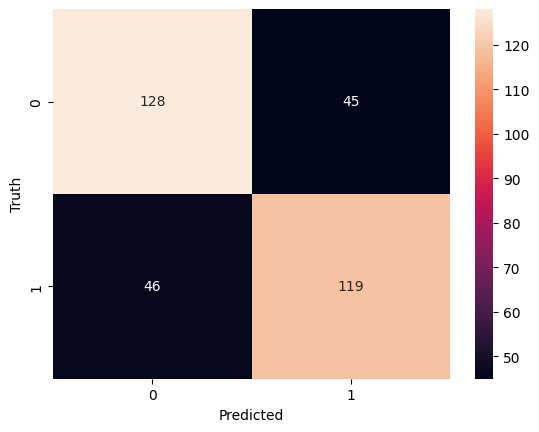

In [50]:
# plotting confusion matrix using seaborn 
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Validation**

In [51]:
# Making predictions

dft=pd.read_csv("project_test.csv")
dft

,Label1,Comments1
0,0,Our driver never showed up and Uber cancelled ...
1,1,"My driver, Rohan was nice, but when I tried to..."
2,1,Uber is overcharging for Toll fees. When In Fl...
3,0,I called uber for going home two days ago and ...
4,1,"Ordering a ride, then putting your 10, 12, and..."


In [52]:
dft_comments=dft.Comments1
dft_comments

0    Our driver never showed up and Uber cancelled ...
1    My driver, Rohan was nice, but when I tried to...
2    Uber is overcharging for Toll fees. When In Fl...
3    I called uber for going home two days ago and ...
4    Ordering a ride, then putting your 10, 12, and...
Name: Comments1, dtype: object

In [53]:
train_sequences_1=tokenizer.texts_to_sequences(dft_comments)

In [54]:
train_padded_1 = pad_sequences(train_sequences_1, maxlen=max_length, padding="post", truncating="post")

In [55]:
test_pred=model.predict(train_padded_1)
test_pred

1/1 [==============================] - 0s 24ms/step


array([[0.00287202],
       [0.996396  ],
       [0.9958657 ],
       [0.00305123],
       [0.00282478]], dtype=float32)

In [56]:
test_pred2=test_pred.flatten()
test_pred2

array([0.00287202, 0.996396  , 0.9958657 , 0.00305123, 0.00282478],
      dtype=float32)

In [57]:
test_final=np.where(test_pred2 > 0.5, 1, 0)
test_final

array([0, 1, 1, 0, 0])

In [58]:
test_label=dft.Label1
test_label

0    0
1    1
2    1
3    0
4    1
Name: Label1, dtype: int64

In [59]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_label, test_final) 
accuracy

0.8

In [60]:
for i in range(0,5):
  print(dft_comments[i])
  if (test_final[i] ==0):
    print("Review - Fair(related to driver)")
  else:
    print("Review - unfair(not related)")  
  print("\n")

Our driver never showed up and Uber cancelled our ride, not us. They charged us a cancellation fee for them cancelling. When I disputed it they would only credit it on future ride instead of refund back to our credit card. Why am I only getting a credit on account instead of a full refund to my credit card used?? This is not right what you have done when it was a Uber error.
Review - Fair(related to driver)


My driver, Rohan was nice, but when I tried to add tip I noticed that he had switched my $9 9am fare in French Quarter to someone else's 2pm trip in Metairie for $28.00! UBER refused to acknowledge. 5 attempts to rectify problem and received nothing but irrelevant automated replies. If you get in the car with Rohan in NOLA and he says he can't get his system to work, it's a a SCAM. Terrible customer service from UBER with zero relevant assistance after 7 days of requesting corrected bill. BEWARE.
Review - unfair(not related)


Uber is overcharging for Toll fees. When In Florida th